# Image recognition android application project
- Flower image classification with Baseline CNN (20200823)  
- 4685 training set with 5 class, 100 iterations, no batch

### Reference
- [Advanced Computer Vision with TensorFlow], https://stephan-osterburg.gitbook.io/coding/coding/ml-dl/tensorfow

## 1. Import packages

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import tarfile
import glob
from six.moves import urllib
from glob import glob
import random
import shutil

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


## 2. Load and Explore the Flower Dataset

In [3]:
def load_data_files(base_dir):
    folder_name = "dataset/flower_photos"
    RAW_DATASET = os.path.join(base_dir, folder_name)

    abs_dir = os.path.join(os.getcwd(), folder_name)
    sub_dir = os.listdir(abs_dir)
    data_dic = {}
    
    for class_name  in sub_dir:
        imgs = glob(os.path.join(RAW_DATASET,class_name,"*.jpg"))

        data_dic[class_name] = imgs
        print("Class: {}".format(class_name))
        print("Number of images: {} \n".format(len(imgs)))

    return data_dic

In [4]:
BASE_DIR = os.getcwd()
data_dic = load_data_files(BASE_DIR)

Class: daisy
Number of images: 1020 

Class: dandelion
Number of images: 1277 

Class: roses
Number of images: 1124 

Class: sunflowers
Number of images: 1158 

Class: tulips
Number of images: 1275 



## 3. Split train and validation dataset

In [5]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)
    print("Copied {} files.\n".format(len(files)))

In [6]:
def train_validation_split(base_dir, data_dic, split_ratio=0.2):
    FLOWER_DATASET = os.path.join(base_dir,"flower_dataset")

    if not os.path.exists(FLOWER_DATASET):
        os.makedirs(FLOWER_DATASET)

    for class_name, imgs in data_dic.items():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]

        copy_files_to_directory(train, os.path.join(FLOWER_DATASET,"train",class_name))
        copy_files_to_directory(validation, os.path.join(FLOWER_DATASET,"validation",class_name))

In [7]:
# BASE_DIR = os.getcwd()

# train_validation_split(BASE_DIR, data_dic, split_ratio=0.2)

## 4. Image preprocessing

In [8]:
batch_size = 1
num_classes = 5
epochs = 100

In [9]:
preprocessing_image = tf.keras.preprocessing.image

train_datagen = preprocessing_image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = preprocessing_image.ImageDataGenerator(rescale=1./255)

In [10]:
BASE_DIR = os.getcwd()

train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "flower_dataset/train"),
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "flower_dataset/validation"),
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')

Found 4685 images belonging to 5 classes.
Found 1169 images belonging to 5 classes.


## 5. Baseline CNN model

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_______________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=adam(lr=0.0005), metrics=['accuracy'])

## 6. Training

In [14]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 4685//batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps=20)

Epoch 1/100
4685/4685 [==============================] - 164s 35ms/step - loss: 1.4162 - accuracy: 0.3870 - val_loss: 0.7104 - val_accuracy: 0.5500
Epoch 2/100
4685/4685 [==============================] - 174s 37ms/step - loss: 1.2477 - accuracy: 0.4905 - val_loss: 1.2013 - val_accuracy: 0.5500
Epoch 3/100
4685/4685 [==============================] - 199s 42ms/step - loss: 1.1661 - accuracy: 0.5381 - val_loss: 2.2744 - val_accuracy: 0.6000
Epoch 4/100
4685/4685 [==============================] - 181s 39ms/step - loss: 1.1140 - accuracy: 0.5584 - val_loss: 0.4183 - val_accuracy: 0.5000
Epoch 5/100
4685/4685 [==============================] - 168s 36ms/step - loss: 1.0744 - accuracy: 0.5793 - val_loss: 0.8434 - val_accuracy: 0.4500
Epoch 6/100
4685/4685 [==============================] - 162s 35ms/step - loss: 1.0548 - accuracy: 0.5795 - val_loss: 2.0178 - val_accuracy: 0.7000
Epoch 7/100
4685/4685 [==============================] - 160s 34ms/step - loss: 1.0155 - accuracy: 0.6006 - val_

Epoch 56/100
4685/4685 [==============================] - 163s 35ms/step - loss: 0.6746 - accuracy: 0.7562 - val_loss: 0.0205 - val_accuracy: 0.8000
Epoch 57/100
4685/4685 [==============================] - 165s 35ms/step - loss: 0.6617 - accuracy: 0.7654 - val_loss: 0.7363 - val_accuracy: 0.9500
Epoch 58/100
4685/4685 [==============================] - 149s 32ms/step - loss: 0.6790 - accuracy: 0.7562 - val_loss: 0.5115 - val_accuracy: 0.7500
Epoch 59/100
4685/4685 [==============================] - 146s 31ms/step - loss: 0.6699 - accuracy: 0.7601 - val_loss: 7.3073e-05 - val_accuracy: 0.7500
Epoch 60/100
4685/4685 [==============================] - 145s 31ms/step - loss: 0.6728 - accuracy: 0.7560 - val_loss: 9.1511e-04 - val_accuracy: 0.8000
Epoch 61/100
4685/4685 [==============================] - 145s 31ms/step - loss: 0.7153 - accuracy: 0.7458 - val_loss: 0.7144 - val_accuracy: 0.6000
Epoch 62/100
4685/4685 [==============================] - 145s 31ms/step - loss: 0.7385 - accuracy

## 7. Accuracy Analysis and Visualization

In [15]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))

    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Baseline CNN Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Baseline CNN loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

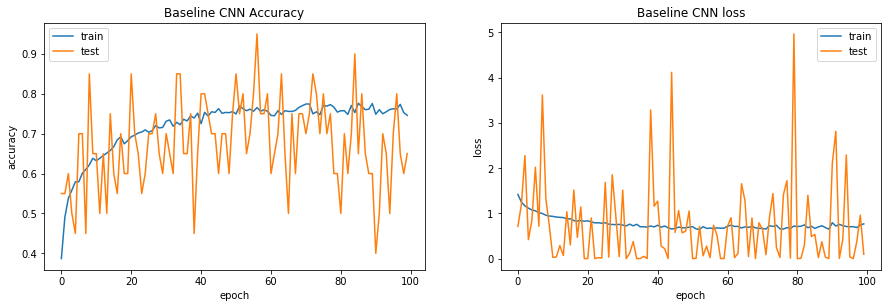

In [16]:
plot_accuracy_and_loss(history)

In [17]:
print("-- Evaluate --")

scores_train = model.evaluate_generator(
            train_generator, 
            steps = 5)
scores_val = model.evaluate_generator(
            validation_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores_train[1]*100))
print("%s: %.2f%%" %(model.metrics_names[1], scores_val[1]*100))

print("-- Predict --")
output_train = model.predict_generator(train_generator, steps=5)
output_val = model.predict_generator(validation_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(train_generator.class_indices)
print(output_train)

print(validation_generator.class_indices)
print(output_val)

-- Evaluate --
accuracy: 80.00%
accuracy: 80.00%
-- Predict --
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
[[0.000 0.007 0.018 0.000 0.974]
 [0.013 0.100 0.861 0.000 0.026]
 [0.380 0.016 0.571 0.006 0.027]
 [0.058 0.297 0.465 0.014 0.166]
 [0.035 0.059 0.314 0.058 0.534]]
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
[[0.334 0.182 0.027 0.247 0.210]
 [0.000 0.000 0.000 0.000 1.000]
 [0.082 0.015 0.141 0.009 0.754]
 [1.000 0.000 0.000 0.000 0.000]
 [0.027 0.012 0.473 0.230 0.259]]


## 8. Save and Load model

In [18]:
# save model architecture
model_json = model.to_json()
open('5_model.json', 'w').write(model_json)

# save model's learned weights
model.save_weights('5_weights.h5', overwrite=True)

In [19]:
# Load trained model
from keras.models import model_from_json 

json_file = open("5_model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("5_weights.h5")
print("Loaded model from disk")

Loaded model from disk
